# DAT257x: Reinforcement Learning Explained

## Lab: Temporal Difference Learning

### Q-Learning Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.simulation import Experiment

In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [3]:
class QLearningAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(QLearningAgent, self).__init__(actions)
        
        self.Q = {}
        for a in self.actions:
            self.Q[('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0',a)] = 0 # SimpleRoomsEnv
        
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma

    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        action = np.random.randint(0, self.num_actions) 
        
        ## epsilon greedy policy
        state_set = set([k[0] for k in agent.Q.keys()])
        if stateStr not in state_set:
            for a in self.actions:
                self.Q[(stateStr,a)] = 0
        
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
            
        if choice != 1:    
            action_dict = {}
            for key,value in self.Q.items():
                if key[0]==stateStr:
                    action_dict[key[1]] = value
            highest=max(action_dict.values())  
            actions = [a for a,v in action_dict.items() if v == highest]
            # If multiple max chose random
            action = np.random.choice(actions)
        
        return action
    
    def learn(self, state1, action1, reward, state2, done):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## q-learning update
        state_set = set([k[0] for k in agent.Q.keys()])
        if state2Str in state_set:
            Qmax = max([self.Q[(state2Str, a)] for a in self.actions])
        else:
            Qmax = 0
        td_target = reward + self.gamma*Qmax
        self.Q[(state1Str, action1)] += self.alpha*(td_target - self.Q[(state1Str, action1)])
        """
        Q-learning Update:
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * max(Q(s') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """

<IPython.core.display.Javascript object>


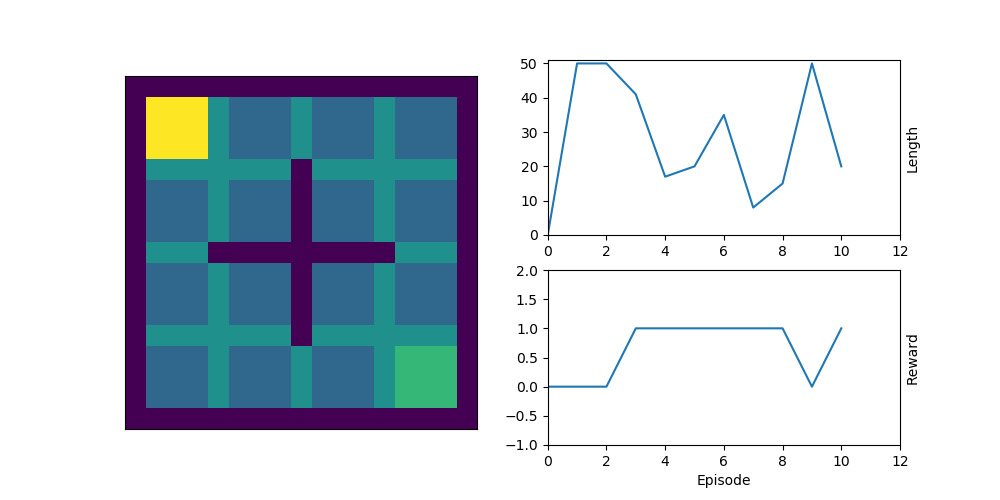

In [7]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

<Figure size 720x360 with 0 Axes>

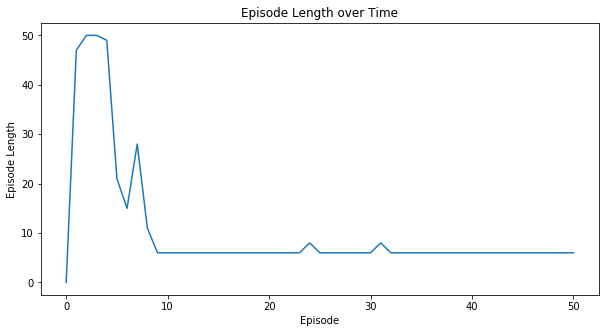

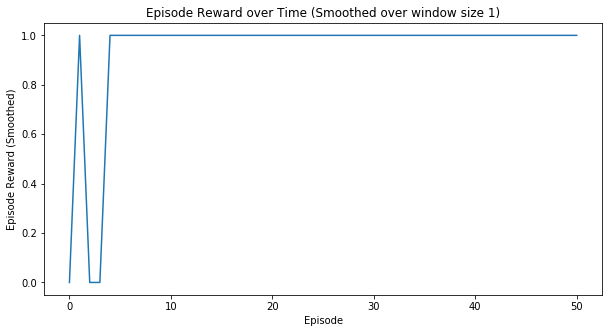

In [5]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)

"After an initial transient, Q-learning learns values for the optimal policy, that which travels right along the edge of the cliff. Unfortunately, this results in its occasionally falling off the cliff because of the epsilon-greedy action selection. Sarsa, on the other hand, takes the action selection into account and learns the longer but safer path through the upper part of the grid. Although Q-learning actually learns the values of the optimal policy, its on-line performance is worse than that of Sarsa, which learns the roundabout policy. If epsilon were gradually reduced, then both methods would asymptotically converge to the optimal policy."

-- Sutton & Barto